In [2]:
!pip install statsmodels
!pip install matplotlib

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
!pip install pandas numpy matplotlib statsmodels pmdarima

In [6]:
import pickle

In [12]:
# Load df1 from pickle file
with open("eda_results.pickle", "rb") as f:
    df1_loaded = pickle.load(f)

In [14]:
df1_loaded

,Date,Price,Open,High,Low,Vol,Change %,AvgPrice_5,AvgPrice_30,AvgPrice_365,...,Return_365,MovingAvg_1,MovingAvg_30,MovingAvg_365,Upper_Band_5,Lower_Band_5,Upper_Band_30,Lower_Band_30,Upper_Band_365,Lower_Band_365
0,2018-05-26,0.6088,0.6056,0.6247,0.5989,99110000.0,0.0052,NaN,NaN,NaN,...,NaN,0.6088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-27,0.6046,0.6088,0.6119,0.5988,95150000.0,-0.0068,NaN,NaN,NaN,...,NaN,0.6046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-28,0.5476,0.6047,0.6075,0.5460,158340000.0,-0.0943,NaN,NaN,NaN,...,NaN,0.5476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-29,0.5994,0.5476,0.6088,0.5444,155950000.0,0.0945,NaN,NaN,NaN,...,NaN,0.5994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-30,0.5938,0.5994,0.6255,0.5786,132830000.0,-0.0093,0.59084,NaN,NaN,...,NaN,0.5938,NaN,NaN,0.640475,0.541205,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2024-05-22,0.5268,0.5372,0.5382,0.5236,509460000.0,-0.0194,0.52652,0.519970,0.566010,...,0.141001,0.5268,0.519970,0.566010,0.549979,0.503061,0.544505,0.495435,0.708964,0.423055
2188,2024-05-23,0.5288,0.5269,0.5456,0.5091,948100000.0,0.0038,0.52804,0.519447,0.566184,...,0.136960,0.5288,0.519447,0.566184,0.550749,0.505331,0.542438,0.496455,0.708800,0.423569
2189,2024-05-24,0.5358,0.5288,0.5372,0.5169,513880000.0,0.0133,0.53326,0.519723,0.566411,...,0.182520,0.5358,0.519723,0.566411,0.543424,0.523096,0.543308,0.496139,0.708568,0.424254
2190,2024-05-25,0.5416,0.5359,0.5425,0.5334,246380000.0,0.0109,0.53404,0.520263,0.566652,...,0.193740,0.5416,0.520263,0.566652,0.546292,0.521788,0.545095,0.495432,0.708340,0.424963


In [16]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def check_stationarity(series, column_name):
    result = adfuller(series.dropna())
    print(f"ADF Test for {column_name}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print(f" {column_name} is NON-STATIONARY. Differencing required.\n")
    else:
        print(f" {column_name} is STATIONARY.\n")

# Apply stationarity test to key columns
columns_to_test = ['AvgPrice_5', 'AvgPrice_30', 'AvgPrice_365']
for col in columns_to_test:
    check_stationarity(df1_loaded[col], col)

ADF Test for AvgPrice_5:
ADF Statistic: -3.199460647522754
p-value: 0.020015920292089102
 AvgPrice_5 is STATIONARY.

ADF Test for AvgPrice_30:
ADF Statistic: -1.8035256036710139
p-value: 0.37871273945259376
 AvgPrice_30 is NON-STATIONARY. Differencing required.

ADF Test for AvgPrice_365:
ADF Statistic: -2.122294445769693
p-value: 0.2356448956524892
 AvgPrice_365 is NON-STATIONARY. Differencing required.



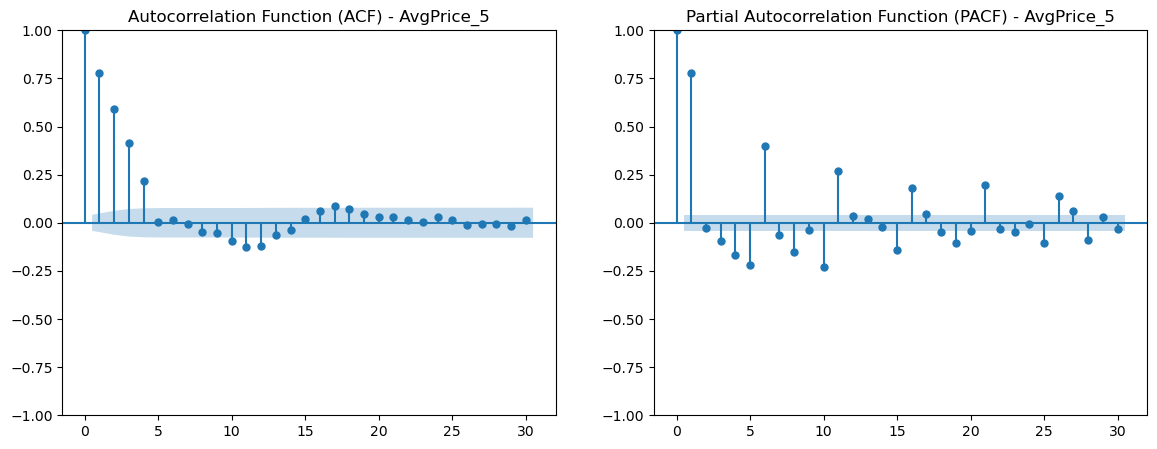

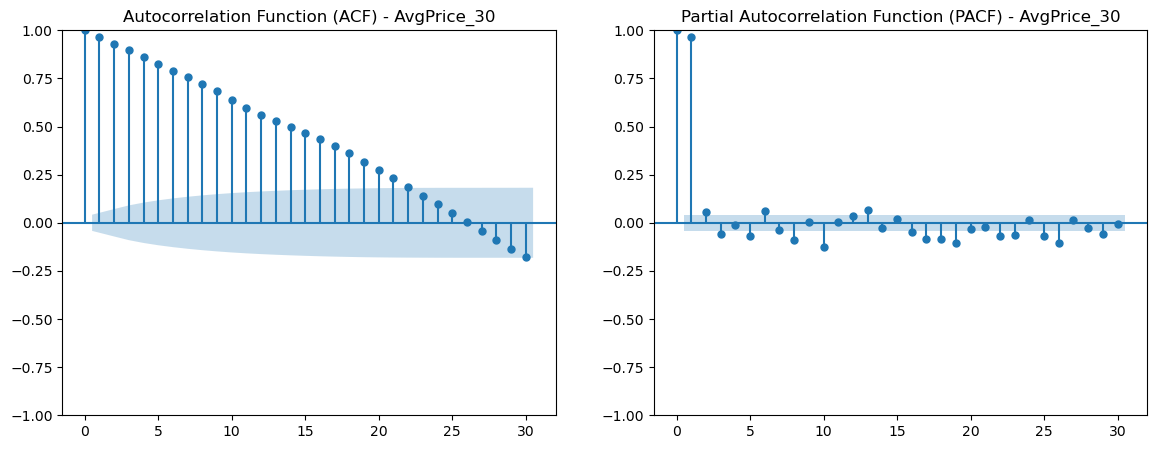

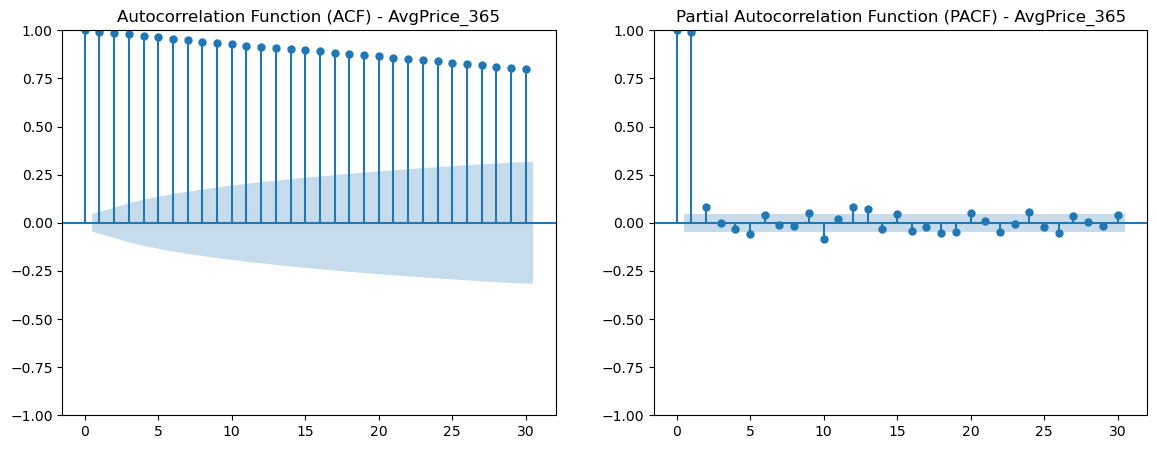

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Plot ACF & PACF for each column
def plot_acf_pacf(series, column_name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # ACF Plot (for q value)
    sm.graphics.tsa.plot_acf(series.dropna(), lags=30, ax=axes[0])
    axes[0].set_title(f"Autocorrelation Function (ACF) - {column_name}")

    # PACF Plot (for p value)
    sm.graphics.tsa.plot_pacf(series.dropna(), lags=30, ax=axes[1])
    axes[1].set_title(f"Partial Autocorrelation Function (PACF) - {column_name}")

    plt.show()

# Apply to key columns
for col in columns_to_test:
    plot_acf_pacf(df1_loaded[col].diff().dropna(), col)


In [24]:

from pmdarima.arima import auto_arima

In [26]:


# Auto-ARIMA to determine best parameters
best_orders = {}

for col in columns_to_test:
    print(f"\nFinding best ARIMA order for {col}...")
    auto_model = auto_arima(df1_loaded[col].dropna(), seasonal=False, stepwise=True, trace=True)
    best_orders[col] = auto_model.order
    print(f"Best ARIMA Order for {col}: {auto_model.order}\n")



Finding best ARIMA order for AvgPrice_5...
Performing stepwise search to minimize aic


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-14035.899, Time=1.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-12018.823, Time=0.10 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-14032.145, Time=0.14 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-13200.300, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-12020.817, Time=0.08 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-14029.093, Time=0.13 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-14028.907, Time=0.45 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-14036.117, Time=1.29 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-14038.977, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-14049.915, Time=0.18 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-14031.689, Time=0.24 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-14108.738, Time=0.25 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-14212.021, Time=0.55 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-14361.161, Time=1.62 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-14117.419, Time=1.48 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-14497.735, Time=2.35 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-14025.875, Time=1.85 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-14566.252, Time=1.99 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-14436.524, Time=1.82 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0] intercept   : AIC=-15268.237, Time=2.41 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=-15219.953, Time=1.93 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,5)(0,0,0)[0] intercept   : AIC=-15248.883, Time=2.76 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=2.50 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(5,1,4)(0,0,0)[0]             : AIC=-15265.275, Time=1.38 sec

Best model:  ARIMA(5,1,4)(0,0,0)[0] intercept
Total fit time: 27.606 seconds
Best ARIMA Order for AvgPrice_5: (5, 1, 4)


Finding best ARIMA order for AvgPrice_30...
Performing stepwise search to minimize aic


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21560.873, Time=0.35 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-15907.663, Time=0.29 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21551.240, Time=0.22 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17912.064, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-15909.611, Time=0.07 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-21561.450, Time=0.32 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-18373.536, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-21555.475, Time=0.15 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-21559.715, Time=0.44 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-19453.095, Time=1.17 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21555.533, Time=0.94 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-21556.216, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-21563.451, Time=0.20 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-19406.592, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-21557.476, Time=0.10 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-21562.869, Time=0.17 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-21561.710, Time=0.23 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-17914.459, Time=0.21 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-19717.761, Time=0.71 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-21557.669, Time=0.34 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-21558.228, Time=0.25 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0]          
Total fit time: 7.682 seconds
Best ARIMA Order for AvgPrice_30: (1, 1, 2)


Finding best ARIMA order for AvgPrice_365...
Performing stepwise search to minimize aic


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will b

 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-26994.050, Time=0.94 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-26988.531, Time=0.14 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-26999.054, Time=0.19 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-26998.875, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-26992.056, Time=0.11 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-26997.058, Time=0.24 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-26997.057, Time=0.24 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-26982.472, Time=0.30 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-27001.045, Time=0.28 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-26999.053, Time=0.23 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-26999.038, Time=0.38 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-27000.852, Time=0.17 sec


/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-26986.047, Time=0.17 sec

Best model:  ARIMA(1,2,0)(0,0,0)[0]          
Total fit time: 3.890 seconds
Best ARIMA Order for AvgPrice_365: (1, 2, 0)



/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1901: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1908: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


In [28]:
best_orders 

{'AvgPrice_5': (5, 1, 4), 'AvgPrice_30': (1, 1, 2), 'AvgPrice_365': (1, 2, 0)}

In [30]:
from statsmodels.tsa.arima.model import ARIMA

models = {}
fitted_models = {}

for col in columns_to_test:
    p, d, q = best_orders[col]  # Use the best order found
    print(f"Training ARIMA({p}, {d}, {q}) for {col}...")

    model = ARIMA(df1_loaded[col], order=(p, d, q))
    fitted_model = model.fit()

    models[col] = model
    fitted_models[col] = fitted_model

    print(fitted_model.summary())


Training ARIMA(5, 1, 4) for AvgPrice_5...


/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:             AvgPrice_5   No. Observations:                 2192
Model:                 ARIMA(5, 1, 4)   Log Likelihood                7628.303
Date:                Sun, 23 Mar 2025   AIC                         -15236.605
Time:                        12:11:28   BIC                         -15179.684
Sample:                             0   HQIC                        -15215.801
                               - 2192                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0423      0.011     -3.830      0.000      -0.064      -0.021
ar.L2          0.0538      0.012      4.516      0.000       0.030       0.077
ar.L3          0.0126      0.011      1.171      0.2

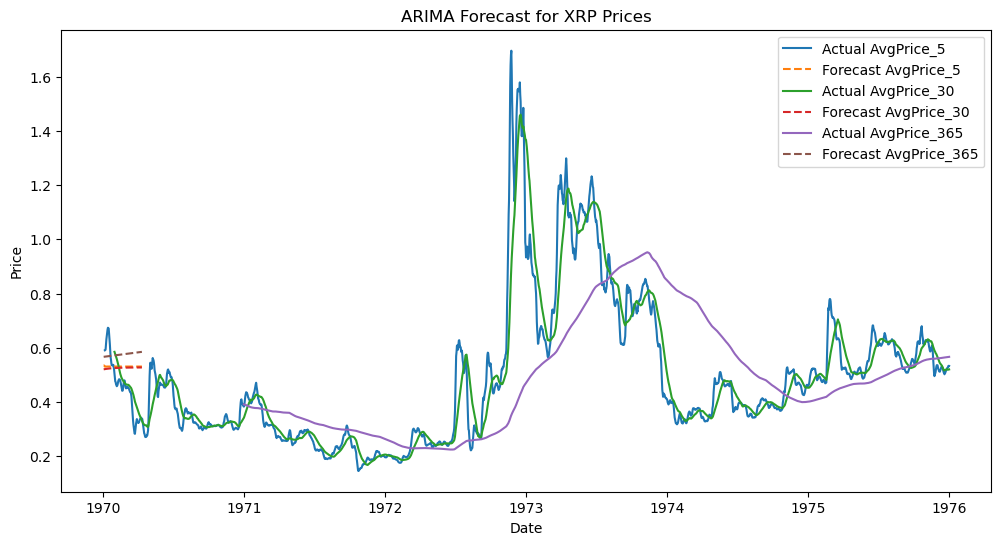

In [34]:
import pandas as pd
forecast_steps = 100 # Forecast for next 10 days

plt.figure(figsize=(12,6))

for col in columns_to_test:
    forecast = fitted_models[col].forecast(steps=forecast_steps)

    # Create date range for forecast
    forecast_dates = pd.date_range(start=df1_loaded.index[-1], periods=forecast_steps+1, freq='D')[1:]

    # Plot actual vs forecast
    plt.plot(df1_loaded[col], label=f"Actual {col}", linestyle='-')
    plt.plot(forecast_dates, forecast, label=f"Forecast {col}", linestyle='--')

plt.title("ARIMA Forecast for XRP Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np

for col in columns_to_test:
    train_size = int(len(df1_loaded[col]) * 0.8)  # 80% train, 20% test
    train, test = df1_loaded[col][:train_size], df1_loaded[col][train_size:]

    # Fit ARIMA again on training data
    p, d, q = best_orders[col]
    model = ARIMA(train, order=(p, d, q))
    model_fit = model.fit()

    # Predict on test set
    predictions = model_fit.forecast(steps=len(test))

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f"RMSE for {col}: {rmse:.4f}")


RMSE for AvgPrice_5: 0.1920


/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE for AvgPrice_30: 0.1867
RMSE for AvgPrice_365: 0.3300


/Users/admin/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
import pickle

# Assuming 'model' is your trained model
with open("ARIIMA.pkl", "wb") as f:
    pickle.dump(model, f)


In [ ]:
#import pickle

# Assuming 'model' is your trained model
#with open("model.pkl", "wb") as f:
    #pickle.dump(model, f)
